In [1]:
# Importing Libraries

import tensorflow as tf

import numpy as np
from PIL import Image
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
# Loading Train images and labels
(X_train , y_train ) , (X_test , y_test )   = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


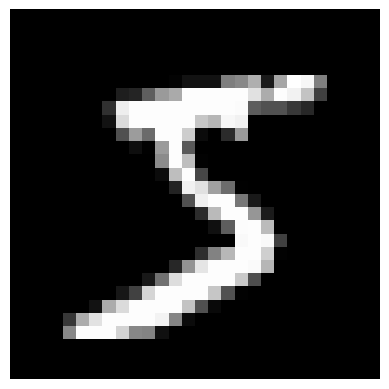

In [3]:
image_array = X_train[0]  # shape: (28, 28)

# Convert NumPy array to PIL Image
image = Image.fromarray(image_array.astype(np.uint8))

# Show the image

plt.imshow(image, cmap='gray' )
plt.axis('off')
plt.show()

In [4]:
print("X Train"  , X_train.shape)
print("X Test" , X_test.shape)
print("Y Train" , y_train.shape)
print("Y Test" , y_test.shape)

X Train (60000, 28, 28)
X Test (10000, 28, 28)
Y Train (60000,)
Y Test (10000,)


In [5]:
# Reshapping
# Suitable as 784 input for the model
X_train = X_train.reshape(-1 ,28*28)
X_test = X_test.reshape(-1 ,28*28)

In [6]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
# MLPClassifier
mlp_model = MLPClassifier(activation = "relu" ,
                          solver = "adam" ,
                          hidden_layer_sizes=(128 , 64))

In [10]:
mlp_model.fit(X_train , y_train)

MLPClassifier(hidden_layer_sizes=(128, 64))

In [11]:
y_pred = mlp_model.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
# Accuracy
print("Accuracy Score : " , metrics.accuracy_score(y_test , y_pred))

Accuracy Score :  0.9804


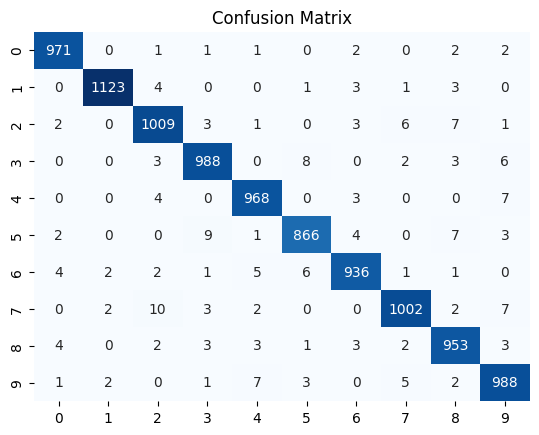

In [17]:
# Confusion metrics
cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(cnf_matrix , cbar = False   , fmt = "d"  , annot = True , cmap = "Blues")
plt.title("Confusion Matrix")
plt.show()